In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize


import itertools
from sklearn.metrics import confusion_matrix

# Datasets

In [3]:
#dataset = 'data/df_stanford_real_features_leagues_[21518, 1729]_seasons_[\'15_16\', \'14_15\', \'13_14\', \'12_13\', \'11_12\', \'10_11\', \'09_10\'].csv'
dataset = 'data/df_stanford_fifa_features_leagues_[21518, 1729]_seasons_[\'15_16\', \'14_15\', \'13_14\', \'12_13\', \'11_12\', \'10_11\', \'09_10\'].csv'
#dataset = 'data/df_match_with_clusters.csv'
#dataset = 'data/df_merge_dataset_stanford_fifa_leagues_[21518, 1729]_seasons_[\'15_16\', \'14_15\', \'13_14\', \'12_13\', \'11_12\', \'10_11\', \'09_10\'].csv'
dataset = 'data/df_stanford_real_features_leagues_[1729]_seasons_[\'15_16\', \'14_15\', \'13_14\', \'12_13\', \'11_12\', \'10_11\', \'09_10\'].csv'
dataset = 'data/df_testing_clustering_app5_[1729]_seasons_[\'15_16\'].csv'
#dataset = 'data/df_stanford_fifa_features_leagues_[21518, 1729]_seasons_[\'15_16\', \'14_15\', \'13_14\', \'12_13\', \'11_12\', \'10_11\', \'09_10\'].csv'
# dataset = 'data/df_FTHG_FTAG_[21518]_seasons_[\'15_16\'].csv'
#dataset = 'data/df_FTHG_FTAG_[21518]_seasons_[\'15_16\', \'14_15\', \'12_13\', \'11_12\', \'10_11\', \'09_10\'].csv'
#dataset = 'data/df_FTHG_FTAG_[21518, 1729]_seasons_[\'15_16\', \'14_15\', \'12_13\', \'11_12\', \'10_11\', \'09_10\'].csv'
# dataset = 'data/df_merge_df_stanfor_seasons_df_stanfor.csv'
#dataset = 'data/df_merge_df_total_features_df_te.csv'

dataset = 'data/df_merge_clustersdata_df_df_te.csv'

print(dataset)
random_seed =1



data/df_merge_clustersdata_df_df_te.csv


## Reading datasets

In [4]:
df = pd.read_csv(dataset)
df.head()

,uid,cluster_team_away_x,cluster_team_home_x,cluster_team_away_y,cluster_team_home_y,home_team_name_id,away_team_name_id,cluster_team_away,cluster_team_home,labels,date
0,bournemouthvilla,2,2,3,2,bournemouth,villa,1,3,A,2015-08-08
1,chelseaswansea,1,0,1,4,chelsea,swansea,4,1,D,2015-08-08
2,evertonwatford,1,0,1,0,everton,watford,2,0,D,2015-08-08
3,leicestersunderland,2,1,3,1,leicester,sunderland,1,8,H,2015-08-08
4,unitedtottenham,0,1,1,1,united,tottenham,8,5,H,2015-08-08


In [5]:
df.columns

Index(['uid', 'cluster_team_away_x', 'cluster_team_home_x',
       'cluster_team_away_y', 'cluster_team_home_y', 'home_team_name_id',
       'away_team_name_id', 'cluster_team_away', 'cluster_team_home', 'labels',
       'date'],
      dtype='object')

In [6]:
if dataset.startswith('data/df_stanford_real_'):
    df = df.drop(columns=['home_team_name_id','away_team_name_id'])
#df = df.drop(columns=['home_team_name_id','away_team_name_id','uid'])    

## Split labels from features

In [7]:
labels = df['labels']
features = df.drop(columns = ['labels'])

# Balance of classes

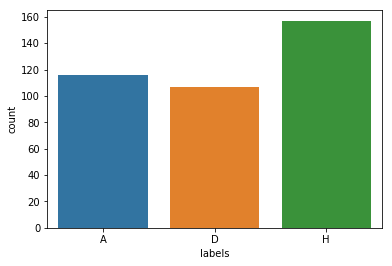

In [8]:
sns.countplot(labels,label="Count")

plt.show()

## Remove Rows With Missing Values

In [65]:
labels = labels[np.invert(features.isnull().any(axis=1))]
features.dropna(inplace=True)


# Functions to convert types

In [66]:
def convert_to(df,type_to_convert, all_categorical = False,columns = 'None'):
 
    if all_categorical == True:
        categoric_types = df.select_dtypes(include=['object','category']).columns
        if categoric_types.empty:
            print('No object types in the dataframe to be converted')
            return df
        else:
            if 'labels' in categoric_types:
                categoric_types.remove('labels')
            df[categoric_types] = df[categoric_types].astype('category')
            columns = categoric_types
        
    else:
        df[columns] = df[columns].astype('category')
        
        
    if type_to_convert == 'labelling':
        for column in columns:
            df[column] = df[column].cat.codes
    elif type_to_convert == 'onehot':
        for column in columns:
            print(columns)
            df= pd.get_dummies(df, columns=[column])             
      
    return df

In [67]:

features = features.drop(columns= 'date')



features = convert_to(features,'onehot', all_categorical = True,columns ='None')


if 'cluster_home' in features.columns:
    features = convert_to(features,'onehot', all_categorical = False,columns =['cluster_home','cluster_away'])



#Change types


# features['FTAG'] = features['FTAG'].astype(int)  #uncomment when fifa players data has stage
# features['FTHG'] = features['FTHG'].astype(int)

features.info()

Index(['uid', 'home_team_name_id', 'away_team_name_id'], dtype='object')
Index(['uid', 'home_team_name_id', 'away_team_name_id'], dtype='object')
Index(['uid', 'home_team_name_id', 'away_team_name_id'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Columns: 426 entries, cluster_team_away_x to away_team_name_id_west
dtypes: int64(6), uint8(420)
memory usage: 176.6 KB


# Create Training and Test Sets and Apply Scaling

In [68]:
X = features
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=random_seed)

In [69]:


X_test.shape


X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 273 to 37
Columns: 426 entries, cluster_team_away_x to away_team_name_id_west
dtypes: int64(6), uint8(420)
memory usage: 132.5 KB


In [70]:
scaler = MinMaxScaler()
scaler = StandardScaler()

numeric_types = X_train.select_dtypes(include=['float64','int'])
#print(numeric_types.columns)

X_train[numeric_types.columns] = scaler.fit_transform(X_train[numeric_types.columns])
X_test[numeric_types.columns]  = scaler.transform(X_test[numeric_types.columns] )






X_test.head()

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,cluster_team_away_x,cluster_team_home_x,cluster_team_away_y,cluster_team_home_y,cluster_team_away,cluster_team_home,uid_arsenalbournemouth,uid_arsenalbrom,uid_arsenalchelsea,uid_arsenalcity,...,away_team_name_id_norwich,away_team_name_id_southampton,away_team_name_id_stoke,away_team_name_id_sunderland,away_team_name_id_swansea,away_team_name_id_tottenham,away_team_name_id_united,away_team_name_id_villa,away_team_name_id_watford,away_team_name_id_west
244,1.461876,0.213702,0.774980,-1.064589,-0.992049,-0.816842,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
180,1.461876,1.537723,0.774980,-1.064589,-0.992049,-0.442565,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,-1.279142,-1.110320,-0.753527,1.112979,1.571600,1.803092,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
185,0.091367,-1.110320,1.539234,-1.064589,0.472894,-1.565394,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
233,-1.279142,-1.110320,-0.753527,-1.064589,1.571600,0.680264,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Functions for feature importance

In [71]:
def dropcol_importances(clf, X_train, y_train):
    from sklearn.base import clone
    clf_ = clone(clf)
    clf_.random_state = 999
    clf_.fit(X_train, y_train)
    baseline = clf.score(X_train, y_train)
    imp = []
    for col in X_train.columns:
        X = X_train.drop(col, axis=1)
        clf_ = clone(clf)
        clf_.random_state = 999
        clf_.fit(X, y_train)
        #o = clf_.oob_score_
        o = clf.score(X_train, y_train)
        imp.append(baseline - o)
    imp = np.array(imp)
    I = pd.DataFrame(
            data={'Feature':X_train.columns,
                  'Importance':imp})
    I = I.set_index('Feature')
    I = I.sort_values('Importance', ascending=False)
    return I


def permutation_importances(clf, X_train, y_train):
    baseline = clf.score(X_train, y_train)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        m = clf.score(X_train, y_train)
        X_train[col] = save
        imp.append(baseline - m)
    imp = np.array(imp)
    I = pd.DataFrame(
            data={'Feature':X_train.columns,
                  'Importance':imp})
    I = I.set_index('Feature')
    I = I.sort_values('Importance', ascending=False)
    return I

In [72]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


## Logistic regression

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 273 to 37
Columns: 426 entries, cluster_team_away_x to away_team_name_id_west
dtypes: float64(6), uint8(420)
memory usage: 132.5 KB
Accuracy of Logistic regression classifier on training set: 0.84
Accuracy of Logistic regression classifier on test set: 0.47
F1 Score of Logistic regression classifier on test set: 0.45
244 has been classified as  H and should be  D
277 has been classified as  D and should be  H
233 has been classified as  D and should be  A
315 has been classified as  H and should be  D
138 has been classified as  H and should be  D
201 has been classified as  D and should be  A
301 has been classified as  A and should be  H
65 has been classified as  A and should be  H
119 has been classified as  H and should be  A
89 has been classified as  H and should be  A
5 has been classified as  H and should be  A
139 has been classified as  H and should be  D
354 has been classified as  A and should be  H
161 has bee

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


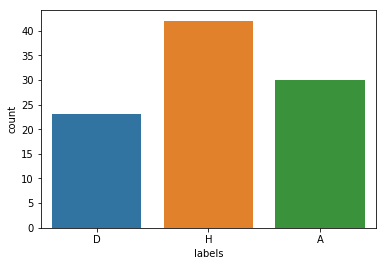

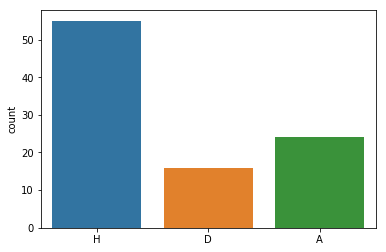

Confusion matrix, without normalization
[[ 2  7 14]
 [10 11  9]
 [ 4  6 32]]
Normalized confusion matrix
[[0.09 0.3  0.61]
 [0.33 0.37 0.3 ]
 [0.1  0.14 0.76]]


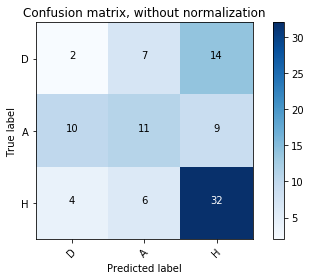

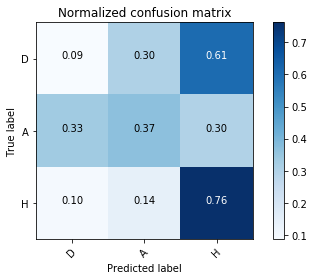

In [77]:
X_train.info()

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))


y_predict = logreg.predict(X_test)
print('F1 Score of Logistic regression classifier on test set: {:.2f}'
     .format(f1_score(y_test, y_predict, average='weighted')))


# dropcol_importances(logreg, X_train, y_train)
# permutation_importances(logreg, X_train, y_train)


predictions = logreg.predict(X_test)
for input, prediction, label in zip(X_test.index, predictions, y_test):
    if prediction != label:
        print(input, 'has been classified as ', prediction, 'and should be ', label) 

list(zip(X_test, predictions, y_test))
print(X_test.head())

sns.countplot(y_test,label="Count")
plt.show()
sns.countplot(predictions,label="Count")
plt.show()

class_names = list(set(y_test))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions,labels=class_names)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## SVC

In [74]:
svm = SVC()
svm.fit(X_train, y_train)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

y_predict = svm.predict(X_test)
print('F1 Score of SVC classifier on test set: {:.2f}'
     .format(f1_score(y_test, y_predict, average='weighted')))

# dropcol_importances(svm, X_train, y_train)
# permutation_importances(svm, X_train, y_train)

Accuracy of SVM classifier on training set: 0.40
Accuracy of SVM classifier on test set: 0.44
F1 Score of SVC classifier on test set: 0.27


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


244 has been classified as  H and should be  D
185 has been classified as  H and should be  A
233 has been classified as  H and should be  A
315 has been classified as  H and should be  D
138 has been classified as  H and should be  D
201 has been classified as  H and should be  A
117 has been classified as  H and should be  D
227 has been classified as  H and should be  A
119 has been classified as  H and should be  A
89 has been classified as  H and should be  A
5 has been classified as  H and should be  A
139 has been classified as  H and should be  D
161 has been classified as  H and should be  A
6 has been classified as  H and should be  A
120 has been classified as  H and should be  A
223 has been classified as  H and should be  D
106 has been classified as  H and should be  D
268 has been classified as  H and should be  D
127 has been classified as  H and should be  D
371 has been classified as  H and should be  D
228 has been classified as  H and should be  A
82 has been classi

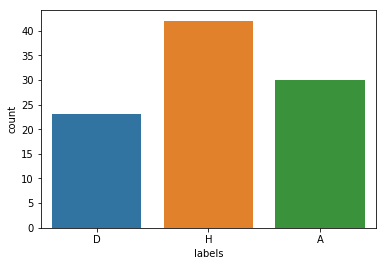

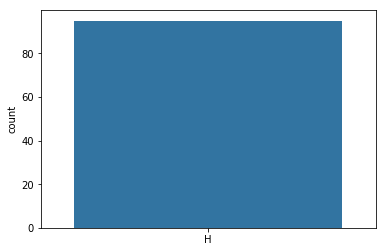

Confusion matrix, without normalization
[[ 0  0 23]
 [ 0  0 30]
 [ 0  0 42]]
Normalized confusion matrix
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


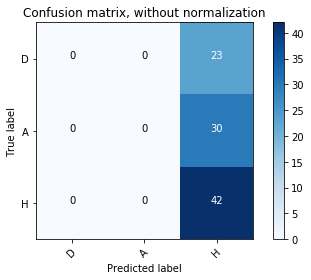

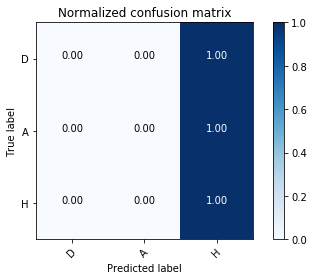

In [75]:
predictions = svm.predict(X_test)
for input, prediction, label in zip(X_test.index, predictions, y_test):
    if prediction != label:
        print(input, 'has been classified as ', prediction, 'and should be ', label) 

list(zip(X_test, predictions, y_test))
X_test.head()


sns.countplot(y_test,label="Count")
plt.show()
sns.countplot(predictions,label="Count")
plt.show()



class_names = list(set(y_test))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions,labels=class_names)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [76]:
list(labels)

['A',
 'D',
 'D',
 'H',
 'H',
 'A',
 'A',
 'D',
 'A',
 'A',
 'A',
 'A',
 'A',
 'H',
 'D',
 'D',
 'A',
 'A',
 'H',
 'H',
 'A',
 'D',
 'D',
 'D',
 'H',
 'D',
 'A',
 'D',
 'A',
 'D',
 'D',
 'A',
 'A',
 'H',
 'A',
 'D',
 'A',
 'D',
 'H',
 'H',
 'D',
 'H',
 'H',
 'A',
 'H',
 'H',
 'H',
 'H',
 'A',
 'H',
 'H',
 'A',
 'H',
 'D',
 'A',
 'A',
 'D',
 'H',
 'D',
 'A',
 'A',
 'H',
 'H',
 'D',
 'H',
 'H',
 'H',
 'D',
 'A',
 'A',
 'A',
 'A',
 'D',
 'A',
 'H',
 'D',
 'H',
 'D',
 'H',
 'D',
 'A',
 'H',
 'A',
 'A',
 'H',
 'D',
 'D',
 'H',
 'H',
 'A',
 'H',
 'A',
 'H',
 'A',
 'A',
 'H',
 'D',
 'D',
 'A',
 'H',
 'H',
 'D',
 'H',
 'A',
 'A',
 'A',
 'D',
 'H',
 'H',
 'H',
 'A',
 'H',
 'D',
 'A',
 'H',
 'H',
 'H',
 'D',
 'D',
 'A',
 'A',
 'H',
 'H',
 'A',
 'A',
 'A',
 'H',
 'D',
 'H',
 'A',
 'H',
 'H',
 'D',
 'A',
 'H',
 'D',
 'H',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'A',
 'H',
 'H',
 'H',
 'A',
 'H',
 'D',
 'H',
 'H',
 'A',
 'D',
 'H',
 'D',
 'D',
 'A',
 'A',
 'H',
 'A',
 'A',
 'A',
 'H',
 'A',
 'A',
 'D'

# Random Forest

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Accuracy of RF classifier on training set: 0.75
Accuracy of RF classifier on test set: 0.42
F1 Score of RF classifier on test set: 0.37


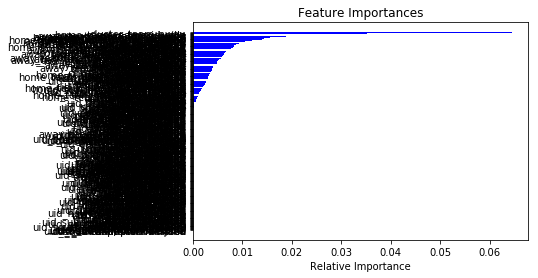

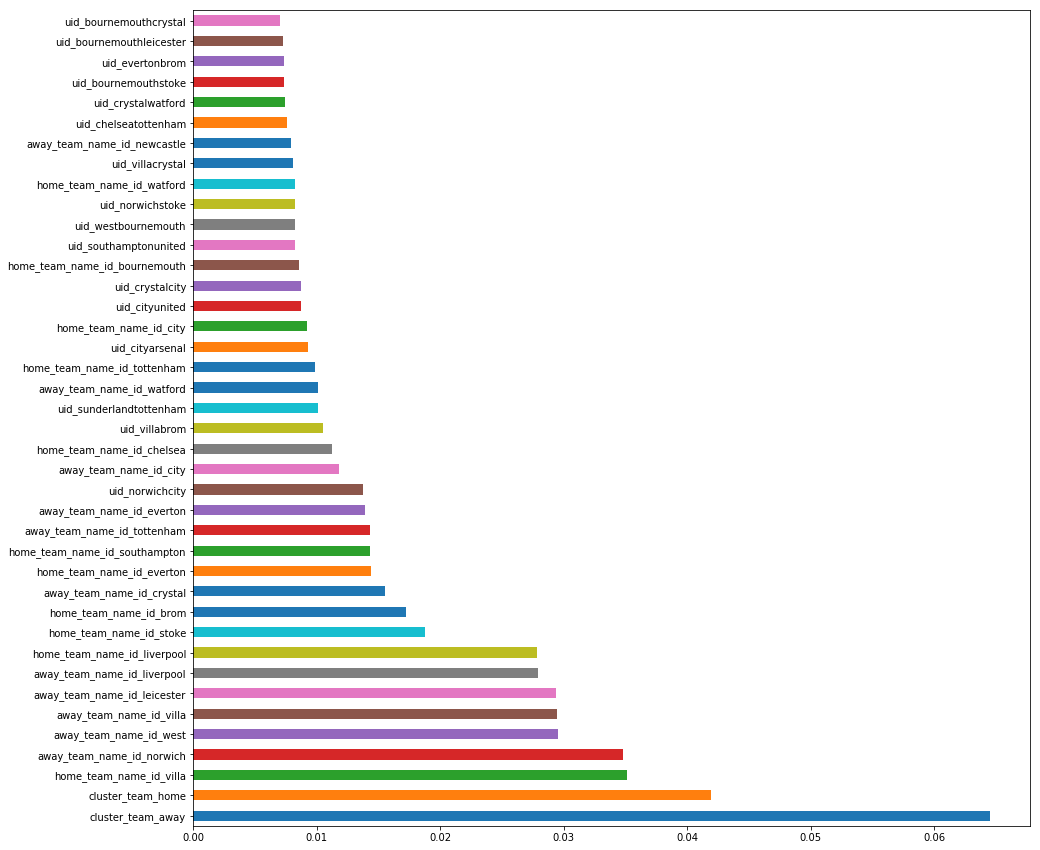

In [20]:
rf = RandomForestClassifier(oob_score=True, max_depth=10)
# X_train = X_train[['FTHG','FTAG']]
# X_test = X_test[['FTHG','FTAG']]

rf.fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

y_predict = rf.predict(X_test)
print('F1 Score of RF classifier on test set: {:.2f}'
     .format(f1_score(y_test, y_predict, average='weighted')))


features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
fig =plt.subplots(figsize=(15,15))
feat_importances.nlargest(40).plot(kind='barh')

244 has been classified as  H and should be  D
180 has been classified as  A and should be  H
277 has been classified as  A and should be  H
315 has been classified as  H and should be  D
138 has been classified as  H and should be  D
201 has been classified as  D and should be  A
117 has been classified as  A and should be  D
65 has been classified as  A and should be  H
119 has been classified as  H and should be  A
89 has been classified as  D and should be  A
5 has been classified as  H and should be  A
139 has been classified as  H and should be  D
354 has been classified as  A and should be  H
320 has been classified as  D and should be  H
161 has been classified as  H and should be  A
6 has been classified as  H and should be  A
120 has been classified as  H and should be  A
223 has been classified as  H and should be  D
238 has been classified as  A and should be  H
4 has been classified as  A and should be  H
268 has been classified as  H and should be  D
127 has been classifi

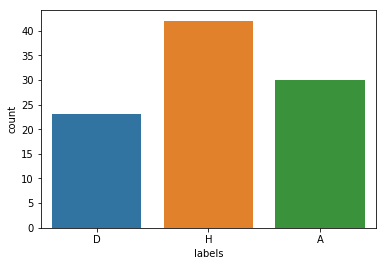

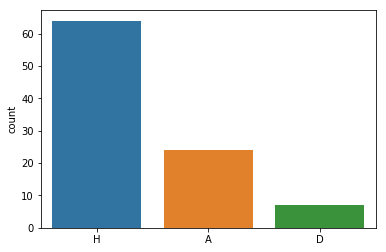

In [21]:
#X_train['random'] = np.random.random(size=len(X_train))

# dropcol_importances(rf, X_train, y_train)
# permutation_importances(rf, X_train, y_train)


predictions = rf.predict(X_test)
for input, prediction, label in zip(X_test.index, predictions, y_test):
    if prediction != label:
        print(input, 'has been classified as ', prediction, 'and should be ', label) 

list(zip(X_test, predictions, y_test))
X_test.head()

sns.countplot(y_test,label="Count")
plt.show()
sns.countplot(predictions,label="Count")
plt.show()



## Let's try to convert the label to dummy variables

Confusion matrix, without normalization
[[ 1  5 17]
 [ 4  9 17]
 [ 2 10 30]]
Normalized confusion matrix
[[0.04 0.22 0.74]
 [0.13 0.3  0.57]
 [0.05 0.24 0.71]]


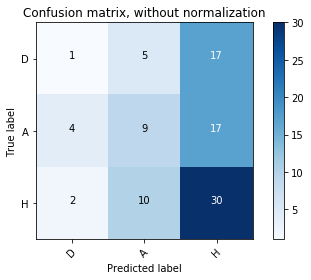

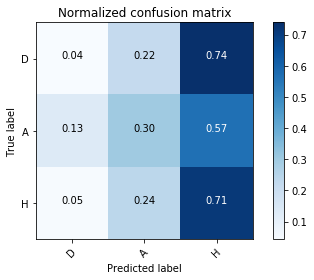

In [22]:



    
class_names = list(set(y_test))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions,labels=class_names)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Accuracy of Logistic regression classifier A on training set: 0.86
Accuracy of Logistic regression classifier A on test set: 0.71
Accuracy of Logistic regression classifier H on training set: 0.87
Accuracy of Logistic regression classifier H on test set: 0.59
Accuracy of Logistic regression classifier D on training set: 0.82
Accuracy of Logistic regression classifier D on test set: 0.75


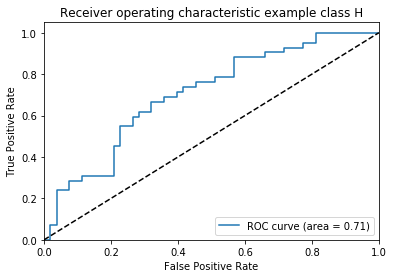

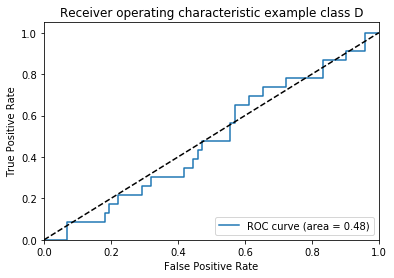

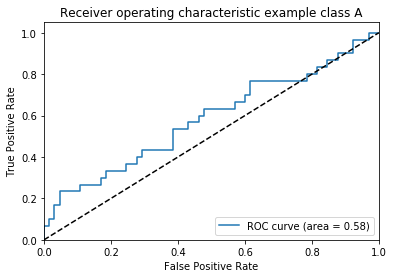

In [23]:
y_train_A = pd.get_dummies(y_train)['A']
y_test_A = pd.get_dummies(y_test)['A']

logreg = LogisticRegression()
logreg.fit(X_train, y_train_A)

print('Accuracy of Logistic regression classifier A on training set: {:.2f}'
     .format(logreg.score(X_train, y_train_A)))

print('Accuracy of Logistic regression classifier A on test set: {:.2f}'
     .format(logreg.score(X_test, y_test_A)))






y_train_H = pd.get_dummies(y_train)['H']
y_test_H = pd.get_dummies(y_test)['H']

logreg = LogisticRegression()
logreg.fit(X_train, y_train_H)

print('Accuracy of Logistic regression classifier H on training set: {:.2f}'
     .format(logreg.score(X_train, y_train_H)))

print('Accuracy of Logistic regression classifier H on test set: {:.2f}'
     .format(logreg.score(X_test, y_test_H)))





y_train_D = pd.get_dummies(y_train)['D']
y_test_D = pd.get_dummies(y_test)['D']

logreg = LogisticRegression()
logreg.fit(X_train, y_train_D)

print('Accuracy of Logistic regression classifier D on training set: {:.2f}'
     .format(logreg.score(X_train, y_train_D)))

print('Accuracy of Logistic regression classifier D on test set: {:.2f}'
     .format(logreg.score(X_test, y_test_D)))



y_train_bin = label_binarize(y_train, classes=['H','D','A'])
y_test_bin = label_binarize(y_test, classes=['H','D','A'])
n_classes = 3
dict_classes = {0:'H',1:'D',2:'A'}



# classifier
clf = OneVsRestClassifier(LogisticRegression())
y_score = clf.fit(X_train, y_train_bin).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example class %s' % dict_classes[i])
    plt.legend(loc="lower right")
    plt.show()


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Logistic regression classifier A on training set: 0.70
Accuracy of Logistic regression classifier A on test set: 0.68
Accuracy of Logistic regression classifier H on training set: 0.60
Accuracy of Logistic regression classifier H on test set: 0.56
Accuracy of Logistic regression classifier D on training set: 0.71
Accuracy of Logistic regression classifier D on test set: 0.76


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


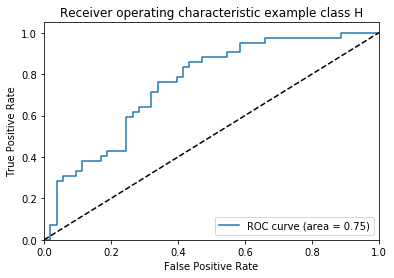

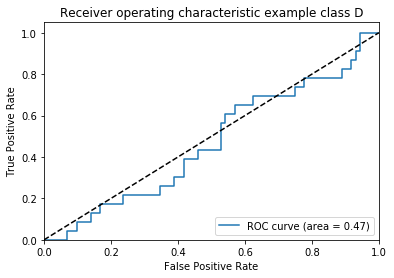

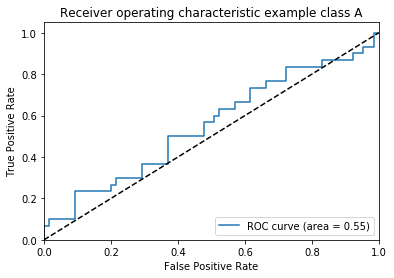

In [24]:
y_train_A = pd.get_dummies(y_train)['A']
y_test_A = pd.get_dummies(y_test)['A']

svc = SVC()
svc.fit(X_train, y_train_A)

print('Accuracy of Logistic regression classifier A on training set: {:.2f}'
     .format(svc.score(X_train, y_train_A)))

print('Accuracy of Logistic regression classifier A on test set: {:.2f}'
     .format(svc.score(X_test, y_test_A)))


y_train_H = pd.get_dummies(y_train)['H']
y_test_H = pd.get_dummies(y_test)['H']

svc = SVC()
svc.fit(X_train, y_train_H)

print('Accuracy of Logistic regression classifier H on training set: {:.2f}'
     .format(svc.score(X_train, y_train_H)))

print('Accuracy of Logistic regression classifier H on test set: {:.2f}'
     .format(svc.score(X_test, y_test_H)))


y_train_D = pd.get_dummies(y_train)['D']
y_test_D = pd.get_dummies(y_test)['D']

svc = SVC()
svc.fit(X_train, y_train_D)

print('Accuracy of Logistic regression classifier D on training set: {:.2f}'
     .format(svc.score(X_train, y_train_D)))

print('Accuracy of Logistic regression classifier D on test set: {:.2f}'
     .format(svc.score(X_test, y_test_D)))


# classifier
clf = OneVsRestClassifier(SVC())
y_score = clf.fit(X_train, y_train_bin).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example class %s' % dict_classes[i])
    plt.legend(loc="lower right")
    plt.show()